In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import os
target_path = '../data/chisato/goal/'
contents = os.listdir(target_path)
data = pd.DataFrame()
num = 0
for c in range(len(contents)):
    print(target_path+contents[c])
    n_data = pd.read_csv(target_path+contents[c],header=None)
    data = pd.concat([data,n_data])

print(len(data))
d = data
#print(ball)
#print(joy)

../data/chisato/goal/log201805261417.csv
../data/chisato/goal/log201805261602.csv
../data/chisato/goal/log201805261614.csv
../data/chisato/goal/log201805261616.csv
../data/chisato/goal/log201805311800.csv
../data/chisato/goal/log201805311803.csv
../data/chisato/goal/log201805311808.csv
../data/chisato/goal/log201805311817.csv
12286


In [3]:
d.columns = ['bx','by','jx','jy']
d = d[d.bx!=-1]

In [4]:
'''
from sklearn.cross_validation import train_test_split
t1 = []
t2 = []
def f1(x,y):
    return y * np.sin(x) + np.square(x)
def f2(x,y):
    return x * np.cos(y) + np.square(y)
for a in range(1000):
    r = np.array([np.random.rand(), np.random.rand()])
    t1.append(r)
    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))
IN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)

IN_train = np.array(IN_train)
IN_test = np.array(IN_test)
TAR_train = np.array(TAR_train)
TAR_test = np.array(TAR_test)
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])
print(f1(1,1))
print(f2(1,1))
'''

'\nfrom sklearn.cross_validation import train_test_split\nt1 = []\nt2 = []\ndef f1(x,y):\n    return y * np.sin(x) + np.square(x)\ndef f2(x,y):\n    return x * np.cos(y) + np.square(y)\nfor a in range(1000):\n    r = np.array([np.random.rand(), np.random.rand()])\n    t1.append(r)\n    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))\nIN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)\n\nIN_train = np.array(IN_train)\nIN_test = np.array(IN_test)\nTAR_train = np.array(TAR_train)\nTAR_test = np.array(TAR_test)\nprint(IN_train[0])\nprint(IN_test[0])\nprint(TAR_train[0])\nprint(TAR_test[0])\nprint(f1(1,1))\nprint(f2(1,1))\n'

In [5]:
from sklearn.cross_validation import train_test_split
ball = np.array(d.iloc[:,0:2])
joy = np.array(d.iloc[:,2:4])
IN_train, IN_test, TAR_train, TAR_test = train_test_split(ball,joy,test_size=0.2,random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
IN_train = IN_train/100.0
IN_test = IN_test/100.0
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])

[ 3.21134644 -0.38153736]
[2.70223083 0.2557914 ]
[ 0.         -0.72167969]
[-0.20620728 -1.        ]


C:\Users\cihsato\Anaconda3\envs\tensorflow16\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
#　初期化
sess = tf.Session()
seed = 3
#tf.set_random_seed(seed)
#np.random.seed(seed)
IN_size = 2
TAR_size = 2
INPUT = tf.placeholder(shape=[None, IN_size], dtype=tf.float32)
TARGET = tf.placeholder(shape=[None, TAR_size], dtype=tf.float32)

In [7]:
hidden_size = [25, 3]
batch_size = 100
iter_size = 50000

#　隠れ層の作成 （last layerに直結）
weights = []
biases = []
layers = []
tmp_size = IN_size
last_layer = INPUT
for hsize in hidden_size:
    weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, hsize], stddev=10.0)))
    biases.append(tf.Variable(tf.random_normal(shape=[hsize], stddev=10.0)))
    layers.append(tf.nn.relu(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))) # 活性化関数
    tmp_size = hsize
    last_layer = layers[-1]
    print(layers[-1])
#　出力層
weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, TAR_size], stddev=10.0)))
biases.append(tf.Variable(tf.random_normal(shape=[TAR_size], stddev=10.0)))
layers.append(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))
final_output = layers[-1]
print(final_output)

Tensor("Relu:0", shape=(?, 25), dtype=float32)
Tensor("Relu_1:0", shape=(?, 3), dtype=float32)
Tensor("Add_2:0", shape=(?, 2), dtype=float32)


In [8]:
#　学習
loss = tf.losses.mean_squared_error(TARGET,final_output)
#opt = tf.train.AdamOptimizer(0.001)
opt = tf.train.GradientDescentOptimizer(0.01)
train_step = opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)
loss_vec=[]
for i in range(iter_size):
    rand_index = np.random.choice(len(IN_train), size=batch_size)
    rand_in = IN_train[rand_index]
    rand_tar = TAR_train[rand_index]
    sess.run(train_step, feed_dict={INPUT:rand_in, TARGET: rand_tar})
    loss_vec.append(sess.run(loss, feed_dict={INPUT:rand_in, TARGET: rand_tar}))
    if (i+1)%25==0:
#        print(sess.run(INPUT, feed_dict={INPUT:rand_in, TARGET: rand_tar}))
        print('Generation:'+str(i+1)+', Loss = '+str(loss_vec[-1]))

Generation:25, Loss = 83375830000000.0
Generation:50, Loss = 50442856000000.0
Generation:75, Loss = 30518213000000.0
Generation:100, Loss = 18463708000000.0
Generation:125, Loss = 11170652000000.0
Generation:150, Loss = 6758313000000.0
Generation:175, Loss = 4088819600000.0
Generation:200, Loss = 2473760400000.0
Generation:225, Loss = 1496640300000.0
Generation:250, Loss = 905476440000.0
Generation:275, Loss = 547818960000.0
Generation:300, Loss = 331433770000.0
Generation:325, Loss = 200519500000.0
Generation:350, Loss = 121315550000.0
Generation:375, Loss = 73396680000.0
Generation:400, Loss = 44405400000.0
Generation:425, Loss = 26865550000.0
Generation:450, Loss = 16253831000.0
Generation:475, Loss = 9833656000.0
Generation:500, Loss = 5949422000.0
Generation:525, Loss = 3599434500.0
Generation:550, Loss = 2177681000.0
Generation:575, Loss = 1317512400.0
Generation:600, Loss = 797100860.0
Generation:625, Loss = 482249920.0
Generation:650, Loss = 291766400.0
Generation:675, Loss = 1

Generation:5950, Loss = 0.19072664
Generation:5975, Loss = 0.22161035
Generation:6000, Loss = 0.19883278
Generation:6025, Loss = 0.1751796
Generation:6050, Loss = 0.18610519
Generation:6075, Loss = 0.16945739
Generation:6100, Loss = 0.17022675
Generation:6125, Loss = 0.17511615
Generation:6150, Loss = 0.19772555
Generation:6175, Loss = 0.19432907
Generation:6200, Loss = 0.22595768
Generation:6225, Loss = 0.19513129
Generation:6250, Loss = 0.21648493
Generation:6275, Loss = 0.21088663
Generation:6300, Loss = 0.20418474
Generation:6325, Loss = 0.17207412
Generation:6350, Loss = 0.18647209
Generation:6375, Loss = 0.20426953
Generation:6400, Loss = 0.18956864
Generation:6425, Loss = 0.16502222
Generation:6450, Loss = 0.196173
Generation:6475, Loss = 0.20205708
Generation:6500, Loss = 0.22761002
Generation:6525, Loss = 0.16939922
Generation:6550, Loss = 0.15167333
Generation:6575, Loss = 0.24035263
Generation:6600, Loss = 0.18938471
Generation:6625, Loss = 0.22352678
Generation:6650, Loss =

Generation:11825, Loss = 0.19878298
Generation:11850, Loss = 0.22182786
Generation:11875, Loss = 0.21027495
Generation:11900, Loss = 0.18777527
Generation:11925, Loss = 0.19559804
Generation:11950, Loss = 0.19740799
Generation:11975, Loss = 0.18701875
Generation:12000, Loss = 0.22227159
Generation:12025, Loss = 0.16602984
Generation:12050, Loss = 0.19551414
Generation:12075, Loss = 0.18360437
Generation:12100, Loss = 0.22123498
Generation:12125, Loss = 0.1988845
Generation:12150, Loss = 0.21510024
Generation:12175, Loss = 0.19686481
Generation:12200, Loss = 0.2212743
Generation:12225, Loss = 0.14569646
Generation:12250, Loss = 0.19762059
Generation:12275, Loss = 0.18741116
Generation:12300, Loss = 0.19141434
Generation:12325, Loss = 0.18682523
Generation:12350, Loss = 0.20980781
Generation:12375, Loss = 0.17123581
Generation:12400, Loss = 0.19407833
Generation:12425, Loss = 0.1959536
Generation:12450, Loss = 0.17521267
Generation:12475, Loss = 0.22206415
Generation:12500, Loss = 0.1786

Generation:17700, Loss = 0.19848394
Generation:17725, Loss = 0.16320015
Generation:17750, Loss = 0.19674286
Generation:17775, Loss = 0.21571249
Generation:17800, Loss = 0.2503317
Generation:17825, Loss = 0.20658036
Generation:17850, Loss = 0.21637172
Generation:17875, Loss = 0.25071704
Generation:17900, Loss = 0.15770216
Generation:17925, Loss = 0.1857452
Generation:17950, Loss = 0.21863717
Generation:17975, Loss = 0.20053054
Generation:18000, Loss = 0.21628368
Generation:18025, Loss = 0.2097252
Generation:18050, Loss = 0.21405627
Generation:18075, Loss = 0.19700867
Generation:18100, Loss = 0.19338474
Generation:18125, Loss = 0.18792763
Generation:18150, Loss = 0.2190649
Generation:18175, Loss = 0.22046156
Generation:18200, Loss = 0.21042584
Generation:18225, Loss = 0.20510803
Generation:18250, Loss = 0.20533584
Generation:18275, Loss = 0.22423628
Generation:18300, Loss = 0.21009234
Generation:18325, Loss = 0.2099588
Generation:18350, Loss = 0.21086453
Generation:18375, Loss = 0.211993

Generation:23550, Loss = 0.1812755
Generation:23575, Loss = 0.19093451
Generation:23600, Loss = 0.17682402
Generation:23625, Loss = 0.20191647
Generation:23650, Loss = 0.20394951
Generation:23675, Loss = 0.19079316
Generation:23700, Loss = 0.23774572
Generation:23725, Loss = 0.21896745
Generation:23750, Loss = 0.18254906
Generation:23775, Loss = 0.24711311
Generation:23800, Loss = 0.19891828
Generation:23825, Loss = 0.20448574
Generation:23850, Loss = 0.22479889
Generation:23875, Loss = 0.17877628
Generation:23900, Loss = 0.18348451
Generation:23925, Loss = 0.20616826
Generation:23950, Loss = 0.21532269
Generation:23975, Loss = 0.18395558
Generation:24000, Loss = 0.19596986
Generation:24025, Loss = 0.19874749
Generation:24050, Loss = 0.1614876
Generation:24075, Loss = 0.18939428
Generation:24100, Loss = 0.24155197
Generation:24125, Loss = 0.21392667
Generation:24150, Loss = 0.19566445
Generation:24175, Loss = 0.21997947
Generation:24200, Loss = 0.2307723
Generation:24225, Loss = 0.2075

Generation:29400, Loss = 0.20189789
Generation:29425, Loss = 0.21127054
Generation:29450, Loss = 0.2201923
Generation:29475, Loss = 0.20336026
Generation:29500, Loss = 0.19914293
Generation:29525, Loss = 0.17964375
Generation:29550, Loss = 0.20028171
Generation:29575, Loss = 0.20687269
Generation:29600, Loss = 0.17393829
Generation:29625, Loss = 0.23104647
Generation:29650, Loss = 0.22409946
Generation:29675, Loss = 0.20888518
Generation:29700, Loss = 0.20622109
Generation:29725, Loss = 0.20217362
Generation:29750, Loss = 0.18456063
Generation:29775, Loss = 0.19018887
Generation:29800, Loss = 0.1743974
Generation:29825, Loss = 0.26555878
Generation:29850, Loss = 0.21494697
Generation:29875, Loss = 0.17497376
Generation:29900, Loss = 0.1828001
Generation:29925, Loss = 0.2015996
Generation:29950, Loss = 0.17861958
Generation:29975, Loss = 0.21177764
Generation:30000, Loss = 0.17850454
Generation:30025, Loss = 0.1842829
Generation:30050, Loss = 0.14919794
Generation:30075, Loss = 0.197590

Generation:35200, Loss = 0.20003898
Generation:35225, Loss = 0.18278308
Generation:35250, Loss = 0.17935058
Generation:35275, Loss = 0.16466779
Generation:35300, Loss = 0.17273045
Generation:35325, Loss = 0.20084919
Generation:35350, Loss = 0.19922096
Generation:35375, Loss = 0.20471439
Generation:35400, Loss = 0.19046894
Generation:35425, Loss = 0.20076267
Generation:35450, Loss = 0.18690534
Generation:35475, Loss = 0.21875682
Generation:35500, Loss = 0.20011215
Generation:35525, Loss = 0.19624762
Generation:35550, Loss = 0.21528047
Generation:35575, Loss = 0.2156287
Generation:35600, Loss = 0.21720652
Generation:35625, Loss = 0.2086219
Generation:35650, Loss = 0.18996502
Generation:35675, Loss = 0.18074818
Generation:35700, Loss = 0.17671654
Generation:35725, Loss = 0.17164563
Generation:35750, Loss = 0.17173174
Generation:35775, Loss = 0.17860371
Generation:35800, Loss = 0.19162126
Generation:35825, Loss = 0.20800781
Generation:35850, Loss = 0.19188574
Generation:35875, Loss = 0.214

Generation:41025, Loss = 0.19537559
Generation:41050, Loss = 0.20675327
Generation:41075, Loss = 0.19412349
Generation:41100, Loss = 0.19628607
Generation:41125, Loss = 0.17346539
Generation:41150, Loss = 0.17794453
Generation:41175, Loss = 0.21596746
Generation:41200, Loss = 0.16184315
Generation:41225, Loss = 0.19671935
Generation:41250, Loss = 0.24999294
Generation:41275, Loss = 0.20956886
Generation:41300, Loss = 0.1684513
Generation:41325, Loss = 0.18724625
Generation:41350, Loss = 0.21518621
Generation:41375, Loss = 0.19445583
Generation:41400, Loss = 0.19502944
Generation:41425, Loss = 0.16311066
Generation:41450, Loss = 0.2214324
Generation:41475, Loss = 0.20324154
Generation:41500, Loss = 0.19978115
Generation:41525, Loss = 0.15759069
Generation:41550, Loss = 0.20240493
Generation:41575, Loss = 0.18955354
Generation:41600, Loss = 0.20378369
Generation:41625, Loss = 0.18854345
Generation:41650, Loss = 0.18981463
Generation:41675, Loss = 0.21687546
Generation:41700, Loss = 0.193

Generation:46900, Loss = 0.2082774
Generation:46925, Loss = 0.14997065
Generation:46950, Loss = 0.18341514
Generation:46975, Loss = 0.19533142
Generation:47000, Loss = 0.20538062
Generation:47025, Loss = 0.21794921
Generation:47050, Loss = 0.19914673
Generation:47075, Loss = 0.23217584
Generation:47100, Loss = 0.19719698
Generation:47125, Loss = 0.1777435
Generation:47150, Loss = 0.16290413
Generation:47175, Loss = 0.20499893
Generation:47200, Loss = 0.16655725
Generation:47225, Loss = 0.1919376
Generation:47250, Loss = 0.21797049
Generation:47275, Loss = 0.20472826
Generation:47300, Loss = 0.19692212
Generation:47325, Loss = 0.20912667
Generation:47350, Loss = 0.20182979
Generation:47375, Loss = 0.1826184
Generation:47400, Loss = 0.18711975
Generation:47425, Loss = 0.2094749
Generation:47450, Loss = 0.24701254
Generation:47475, Loss = 0.2121052
Generation:47500, Loss = 0.21047188
Generation:47525, Loss = 0.1989056
Generation:47550, Loss = 0.16535191
Generation:47575, Loss = 0.18392842

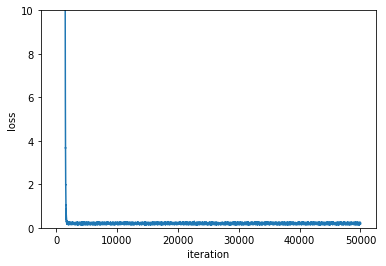

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(loss_vec)
#plt.xlim(0,25)
plt.ylim(0,10)
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.savefig(str(hidden_size)+'.png')

In [10]:
# predict
sample = np.array([[ 5, -0.8]])
p = sess.run(final_output, feed_dict={INPUT: sample})
print(p)

[[ 0.13981256 -0.6941389 ]]


In [11]:
sam_y = np.array(range(-10,11))
for i in range(len(sam_y)):
    sample = np.array([[5.0, sam_y[i]/10.0]])
    print(sample)
    p = sess.run(final_output, feed_dict={INPUT: sample})
    print(p)

[[ 5. -1.]]
[[ 0.13981256 -0.6941389 ]]
[[ 5.  -0.9]]
[[ 0.13981256 -0.6941389 ]]
[[ 5.  -0.8]]
[[ 0.13981256 -0.6941389 ]]
[[ 5.  -0.7]]
[[ 0.13981256 -0.6941389 ]]
[[ 5.  -0.6]]
[[ 0.13981256 -0.6941389 ]]
[[ 5.  -0.5]]
[[ 0.13981256 -0.6941389 ]]
[[ 5.  -0.4]]
[[ 0.13981256 -0.6941389 ]]
[[ 5.  -0.3]]
[[ 0.13981256 -0.6941389 ]]
[[ 5.  -0.2]]
[[ 0.13981256 -0.6941389 ]]
[[ 5.  -0.1]]
[[ 0.13981256 -0.6941389 ]]
[[5. 0.]]
[[ 0.13981256 -0.6941389 ]]
[[5.  0.1]]
[[ 0.13981256 -0.6941389 ]]
[[5.  0.2]]
[[ 0.13981256 -0.6941389 ]]
[[5.  0.3]]
[[ 0.13981256 -0.6941389 ]]
[[5.  0.4]]
[[ 0.13981256 -0.6941389 ]]
[[5.  0.5]]
[[ 0.13981256 -0.6941389 ]]
[[5.  0.6]]
[[ 0.13981256 -0.6941389 ]]
[[5.  0.7]]
[[ 0.13981256 -0.6941389 ]]
[[5.  0.8]]
[[ 0.13981256 -0.6941389 ]]
[[5.  0.9]]
[[ 0.13981256 -0.6941389 ]]
[[5. 1.]]
[[ 0.13981256 -0.6941389 ]]
